In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1) Escreva uma função que receba uma lista de números e retorne outra lista com os números ímpares.

In [13]:
def get_odd_numbers( números ):
    # Converte a lista em um array do numpy
    if not isinstance( números, np.ndarray ):
        números = np.array( números )

    # Retorna os elementos ímpares do array
    return números[ números % 2 != 0 ]

lista_números = [0, 1, 2, 3, 4, 10, 13, 17, 20]
print(f"Os números da lista são: {lista_números}")
print(f"Os números ímpares são: {get_odd_numbers(lista_números)}")

Os números da lista são: [0, 1, 2, 3, 4, 10, 13, 17, 20]
Os números ímpares são: [ 1  3 13 17]


#### 2) Escreva uma função que receba uma lista de números e retorne outra lista com os números primos presentes.

In [14]:
def get_prime_numbers( números ):
    def is_prime( number ):
        if number <= 1:
            return False
        
        # Percorre os antecessores de dado número
        for antecessor in range( number - 1, 1, -1 ):
            # Verifica se o número é divisível por seu antecessor
            if number%antecessor == 0:
                return False
        
        return True
    
    # Converte a lista em um array do numpy
    if not isinstance( números, np.ndarray ):
        números = np.array( números )

    # Aplica a função criada à todos os elementos da lista
    índices_primos = list( map(is_prime, números) )

    # Retorna os elementos primeos da lista
    return números[ índices_primos ]

lista_números = [0, 1, 2, 3, 4, 10, 13, 17, 20]
print(f"Os números da lista são: {lista_números}")
print(f"Os números primos são: {get_prime_numbers(lista_números)}")

Os números da lista são: [0, 1, 2, 3, 4, 10, 13, 17, 20]
Os números primos são: [ 2  3 13 17]


#### 3) Escreva uma função que receba duas listas e retorne outra lista com os elementos que estão presentes em apenas uma das listas.

In [15]:
def xor_lists( lista_a, lista_b ):
    # Converte a lista em um array do numpy
    if not isinstance( lista_a, np.ndarray ):
        lista_a = np.array( lista_a )

    # Converte a lista em um array do numpy
    if not isinstance( lista_b, np.ndarray ):
        lista_b = np.array( lista_b )
    
    # Numpy tem um método builtin para obter os elementos exclusivos entre as listas
    return np.setxor1d( lista_a, lista_b )

lista_a = [0, 1, 2, 3, 4, 10, 13, 17, 20]
lista_b = [0, 2, 4, 6, 7, 8, 10, 17, 25]

print(f"Primeira lista: {lista_a}")
print(f"Segunda lista: {lista_b}")
print(f"Os números exclusivos são: {xor_lists(lista_a, lista_b)}")

Primeira lista: [0, 1, 2, 3, 4, 10, 13, 17, 20]
Segunda lista: [0, 2, 4, 6, 7, 8, 10, 17, 25]
Os números exclusivos são: [ 1  3  6  7  8 13 20 25]


#### 4) Dada uma lista de números inteiros, escreva uma função para encontrar o segundo maior valor na lista.

In [16]:
def second_largest( números ):
    # Converte a lista em um array do numpy
    if not isinstance( números, np.ndarray ):
        números = np.array( números )

    # Organiza em ordem crescente
    números.sort()
    
    # Retorna o segundo maior valor da lista
    return números[-2]

lista_números = np.random.randint( -50, 50, size=(10) )

print(f"Os números da lista são: {lista_números}")
print(f"Segundo maior valor: {second_largest(lista_números)}")

Os números da lista são: [ -3  39 -30  28 -37 -29  39   8   1  35]
Segundo maior valor: 39


#### 5) Crie uma função que receba uma lista de tuplas, cada uma contendo o nome e a idade de uma pessoa, e retorne a lista ordenada pelo nome das pessoas em ordem alfabética.

In [17]:
def sort_persons( pessoas ):
    # Sorteia a lista de tuplas considerando a primeira letra de cada nome
    return sorted( pessoas, key = lambda pessoa: pessoa[0][0] )

lista_pessoas = [
    ("Ciclano de Tals", 40),
    ("Aline fernandes", 35),
    ("Gustavo Augusto", 25),
    ("Luana de Sousa", 20),
    ("Fernanda Luiza", 18),
    ("Beatriz Barbosa", 34),
    ("Alan Pessoa", 23)
]

print( sort_persons(lista_pessoas) )

[('Aline fernandes', 35), ('Alan Pessoa', 23), ('Beatriz Barbosa', 34), ('Ciclano de Tals', 40), ('Fernanda Luiza', 18), ('Gustavo Augusto', 25), ('Luana de Sousa', 20)]


#### 6) Como identificar e tratar outliers em uma coluna numérica usando desvio padrão ou quartis?

Podemos visualizar os dados usando um boxplot de forma que os outliers fiquem visíveis. Além disso, uma das formas de tratar os outliers seria removendo esses pontos da análise (possível ao calcular os valores dos quartis, de forma a obter os limites de corte).

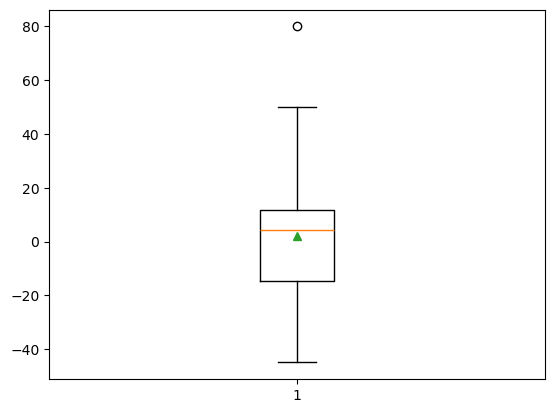

In [18]:
# Cria uma distribuição normal e adiciona algum ruido (representaria os dados da coluna)
y = np.random.normal( 0, 10, 20 )
y = np.append(y, [50, -45, 80])

# Exibe o boxplot, onde os outliers seriam visíveis
fig = plt.boxplot( y, showmeans=True )

#### 7) Como concaternar vários DataFrames (empilhando linhas ou colunas), mesmo que tenham colunas diferentes?

Conforme mencionado, podemos utilizar pd.concat para fazer a concatenação de DataFrames. Dessa forma já temos um tratamento para colunas diferentes, que serão preenchidos com ```NaN```. Além disso, podemos especificar se a concatenação será de linhas ou colunas por meio do valor escolhido para o argumento axis.

In [19]:
dataframe_1 = pd.DataFrame({'Nome': ["Miguel", "Luiza"], 'Idade': [30, 24]})
dataframe_2 = pd.DataFrame({'Nome': ["André", "Felipe"], 'Idade': [20, 34]})
dataframe_3 = pd.DataFrame({'Comida favorita': ["Pizza", "Pudim"], 'Altura': [1.8, 1.6]})

# Concatena as linhas (resetando o índice)
pessoas = pd.concat([dataframe_1, dataframe_2], axis=0, ignore_index=True)

# Concatena as colunas
pessoas = pd.concat([pessoas, dataframe_3], axis=1)

print( pessoas )

     Nome  Idade Comida favorita  Altura
0  Miguel     30           Pizza     1.8
1   Luiza     24           Pudim     1.6
2   André     20             NaN     NaN
3  Felipe     34             NaN     NaN


#### 8) Utilizando panda, como realizar a leitura de um arquivo CSV em um DataFrame e exibir as primeiras linhas?

In [20]:
# Podemos usar read_csv para abrir arquivos CSV (há diversas configurações possíveis)
dataset = pd.read_csv("iris.data", names = ["sepal length", "sepal width", "petal length", "petal width", "class"])

# O método head exibe as primeiras linhas
dataset.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 9) Utilizando pandas, como selecionar uma coluna específica e filtrar linhas em um "DataFrame" com base em uma condição?

In [21]:
# Pandas permite realizar isso de forma direta, apenas especificando o nome da coluna e a condição desejada
dataframe_1 = pd.DataFrame({'Nome': ["Miguel", "Luiza", "Souza", "Felipe", "Andreza", "Sérgio"], 'Idade': [30, 24, 18, 15, 10, 20]})

# Por exemplo, filtrando todas as linhas que possuem valores maiores que 20 na coluna de idade
dataframe_1[ dataframe_1["Idade"] > 20 ]

,Nome,Idade
0,Miguel,30
1,Luiza,24


#### 10) Utilizando pandas, como lidar com valores ausentes (NaN) em um DataFrame?

In [22]:
# Exemplo de dataframe com elementos faltantes (poderíamos especificar 'na_values' caso fosse lido por meio de read_csv)
dataframe = pd.DataFrame({'Nome': ["Miguel", "Luiza", "Souza", "Felipe", "Andreza", "Sérgio"], 'Idade': [30, "?", 18, "?", 10, "?"]})

# Substitui os elementos faltantes por NaN
dataframe = dataframe.where( dataframe != "?", np.nan)
print( dataframe, "\n" )

# A partir dai teríamos algumas opções, tais como atribuir valores específicos para campos com NaN ou remover eles
dataframe_fill_nan = dataframe.fillna(5)    # Preenche os NaN com um valor
print( dataframe_fill_nan, "\n" )

dataframe_without_nan = dataframe.dropna()  # Remove os campos com NaN
print( dataframe_without_nan, "\n" )

      Nome Idade
0   Miguel    30
1    Luiza   NaN
2    Souza    18
3   Felipe   NaN
4  Andreza    10
5   Sérgio   NaN 

      Nome  Idade
0   Miguel     30
1    Luiza      5
2    Souza     18
3   Felipe      5
4  Andreza     10
5   Sérgio      5 

      Nome Idade
0   Miguel    30
2    Souza    18
4  Andreza    10 



C:\Users\Casa 1\AppData\Local\Temp\ipykernel_16568\1402033790.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe_fill_nan = dataframe.fillna(5)    # Preenche os NaN com um valor
